In [4]:
# Exploratory Data Analysis: Women in STEM Global Trends

# Project Objective
# This project examines the participation of women in STEM (Science, Technology, Engineering, and Mathematics) fields across six major nations. The primary goal is to identify trends in enrollment, analyze the relationship between enrollment and graduation rates, and observe the impact of the **Gender Gap Index** on female representation in technical fields.

# Key Questions
# Trend Analysis: Is female enrollment in STEM increasing over time?
# Success Rates: Is there a strong correlation between enrolling in a STEM program and successfully graduating?
# Global Leaders: Which countries lead in female STEM participation and where are the gaps?


In [5]:
# Step 1: Import libraries and load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = "women_in_stem.csv"

try:
    df = pd.read_csv(csv_path)
    # Clean up column names immediately for consistency
    df.columns = [c.strip().replace(" ", "_").replace("(%)", "Percent") for c in df.columns]
    print("Dataset loaded and columns cleaned successfully!")
except FileNotFoundError:
    print("Error: 'women_in_stem.csv' not found. Ensure the file is in the same directory.")

# Verification
df.head()

Dataset loaded and columns cleaned successfully!


,Country,Year,Female_Enrollment_Percent,Female_Graduation_Rate_Percent,STEM_Fields,Gender_Gap_Index
0,China,2018,20.4,43.2,Engineering,0.52
1,China,2005,35.6,29.3,Mathematics,0.98
2,China,2005,53.7,32.4,Biology,0.60
3,Germany,2007,65.0,63.6,Mathematics,0.69
4,Canada,2010,54.4,28.8,Engineering,0.74


In [6]:
# Step 2: Analyze the data
print(df['Country'].nunique(), "countries")

print(df.shape)
print(df.columns)
df.info()
df.head()

6 countries
(500, 6)
Index(['Country', 'Year', 'Female_Enrollment_Percent',
       'Female_Graduation_Rate_Percent', 'STEM_Fields', 'Gender_Gap_Index'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         500 non-null    object 
 1   Year                            500 non-null    int64  
 2   Female_Enrollment_Percent       500 non-null    float64
 3   Female_Graduation_Rate_Percent  500 non-null    float64
 4   STEM_Fields                     500 non-null    object 
 5   Gender_Gap_Index                500 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 23.6+ KB


,Country,Year,Female_Enrollment_Percent,Female_Graduation_Rate_Percent,STEM_Fields,Gender_Gap_Index
0,China,2018,20.4,43.2,Engineering,0.52
1,China,2005,35.6,29.3,Mathematics,0.98
2,China,2005,53.7,32.4,Biology,0.60
3,Germany,2007,65.0,63.6,Mathematics,0.69
4,Canada,2010,54.4,28.8,Engineering,0.74


In [7]:
# Step 3: Check for missing values, duplicates, anomalies
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [8]:
# Step 4: Summarize 
# Clean up column names (replace spaces and symbols)
df.columns = [c.strip().replace(" ", "_").replace("(%)", "Percent") for c in df.columns]


print("Cleaned column names:")
print(df.columns)


print("\n--- Basic Numeric Summary ---")
print(df.describe())


print("\n--- Unique Countries and Fields ---")
print(df['Country'].nunique(), "countries")
print("STEM Fields:", df['STEM_Fields'].unique())

Cleaned column names:
Index(['Country', 'Year', 'Female_Enrollment_Percent',
       'Female_Graduation_Rate_Percent', 'STEM_Fields', 'Gender_Gap_Index'],
      dtype='object')

--- Basic Numeric Summary ---
              Year  Female_Enrollment_Percent  Female_Graduation_Rate_Percent  \
count   500.000000                 500.000000                      500.000000   
mean   2011.418000                  43.939800                       36.715200   
std       7.187112                  14.316864                       15.964231   
min    2000.000000                  20.100000                       10.100000   
25%    2005.000000                  31.575000                       23.150000   
50%    2011.000000                  43.500000                       35.900000   
75%    2018.000000                  56.500000                       50.425000   
max    2023.000000                  69.500000                       64.900000   

       Gender_Gap_Index  
count        500.000000  
mean       

In [9]:
# Step 4.1
print("\n--- Detailed Descriptive Statistics ---")

# Numeric columns to analyze
numeric_cols = ['Female_Enrollment_Percent', 'Female_Graduation_Rate_Percent', 'Gender_Gap_Index']

# Mean
print("\nMean values:")
print(df[numeric_cols].mean())

# Median
print("\nMedian values:")
print(df[numeric_cols].median())

# Mode
print("\nMode values:")
print(df[numeric_cols].mode().iloc[0])

# Standard deviation
print("\nStandard deviation:")
print(df[numeric_cols].std())

# Variance
print("\nVariance:")
print(df[numeric_cols].var())

# Range (max - min)
print("\nRange:")
print(df[numeric_cols].max() - df[numeric_cols].min())



--- Detailed Descriptive Statistics ---

Mean values:
Female_Enrollment_Percent         43.93980
Female_Graduation_Rate_Percent    36.71520
Gender_Gap_Index                   0.74598
dtype: float64

Median values:
Female_Enrollment_Percent         43.50
Female_Graduation_Rate_Percent    35.90
Gender_Gap_Index                   0.75
dtype: float64

Mode values:
Female_Enrollment_Percent         20.40
Female_Graduation_Rate_Percent    11.40
Gender_Gap_Index                   0.63
Name: 0, dtype: float64

Standard deviation:
Female_Enrollment_Percent         14.316864
Female_Graduation_Rate_Percent    15.964231
Gender_Gap_Index                   0.138183
dtype: float64

Variance:
Female_Enrollment_Percent         204.972581
Female_Graduation_Rate_Percent    254.856682
Gender_Gap_Index                    0.019095
dtype: float64

Range:
Female_Enrollment_Percent         49.4
Female_Graduation_Rate_Percent    54.8
Gender_Gap_Index                   0.5
dtype: float64


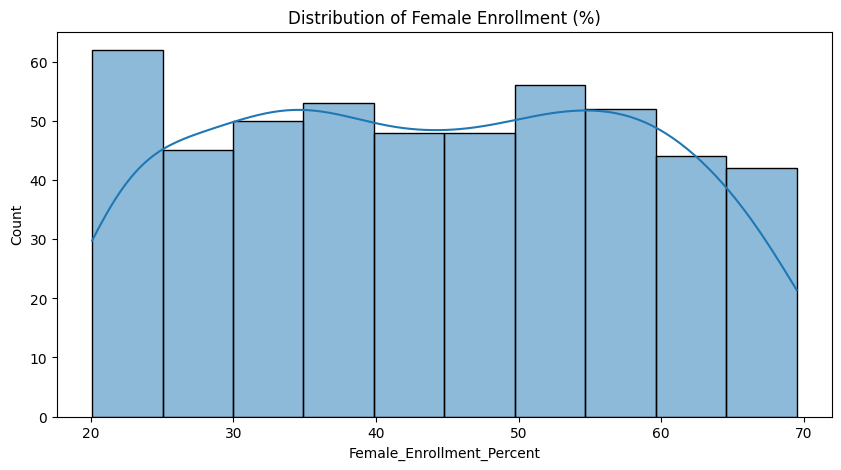

In [10]:
# Step 5: Check distributions
plt.figure(figsize=(10,5))
sns.histplot(df['Female_Enrollment_Percent'], kde=True)
plt.title("Distribution of Female Enrollment (%)")
plt.show()

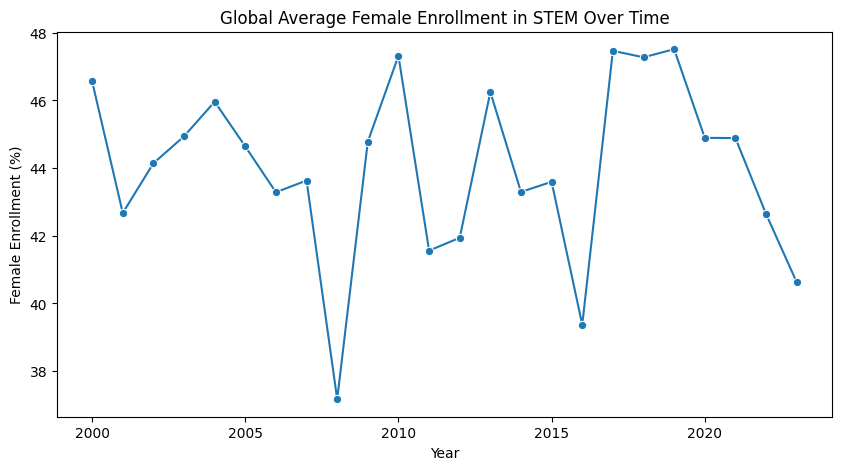

In [11]:
# Step 6: Spot patterns and relationships
# 6.1 Trend over time
plt.figure(figsize=(10,5))
sns.lineplot(
data=df.groupby('Year')['Female_Enrollment_Percent'].mean().reset_index(),
x='Year', y='Female_Enrollment_Percent', marker='o'
)
plt.title("Global Average Female Enrollment in STEM Over Time")
plt.ylabel("Female Enrollment (%)")
plt.show()

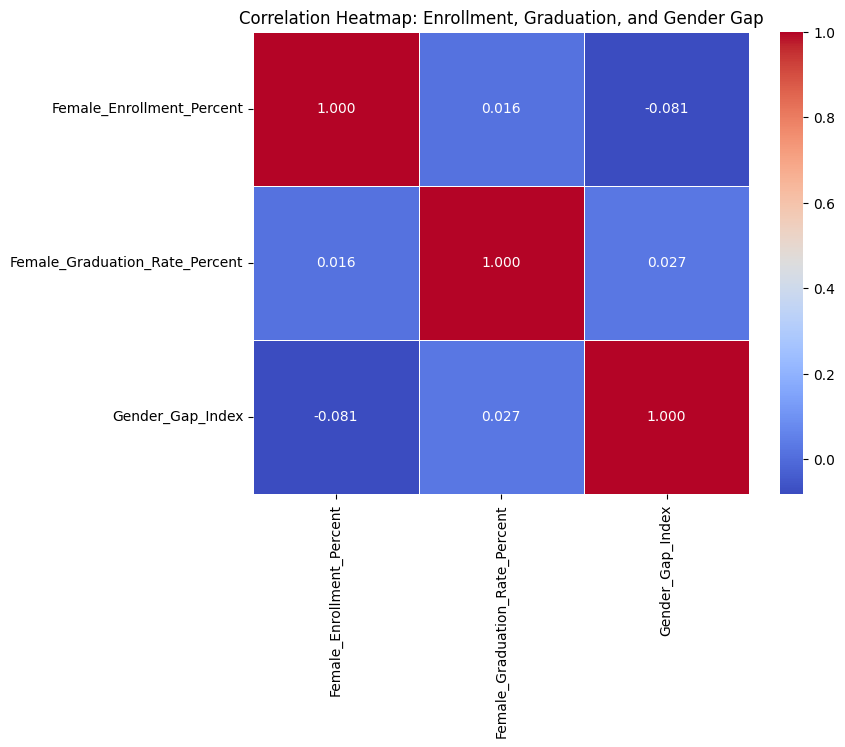

             EXECUTIVE SUMMARY

Key Statistical Summary:

                                 Mean  Median  Std Dev
Female_Enrollment_Percent       43.94   43.50    14.32
Female_Graduation_Rate_Percent  36.72   35.90    15.96
Gender_Gap_Index                 0.75    0.75     0.14

Top 3 Countries (Avg Enrollment):
Country
USA          45.72
Canada       44.96
Australia    44.04
Name: Female_Enrollment_Percent, dtype: float64

Bottom 3 Countries (Avg Enrollment):
Country
China      43.38
India      42.78
Germany    42.65
Name: Female_Enrollment_Percent, dtype: float64
OBSERVATIONS & ANALYSIS
1. RETAINED VS. ENROLLED: While global female STEM enrollment averages 43.94%, 
   graduation rates sit at 36.72%. This 7.22% 'Retention Gap' suggests 
   that recruitment is more successful than long-term support and degree completion.

2. CORRELATION ANALYSIS: The correlation between enrollment and graduation is extremely low 
   (0.016). This implies that simply increasing enrollment numbers does no

In [13]:
#Executive Summary & Analytical Insights

# 1. Visualization: Correlation Heatmap
plt.figure(figsize=(8, 6))
numeric_cols = ['Female_Enrollment_Percent', 'Female_Graduation_Rate_Percent', 'Gender_Gap_Index']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title("Correlation Heatmap: Enrollment, Graduation, and Gender Gap")
plt.show()

# 2. Key Statistical Summary
summary_stats = pd.DataFrame({
    'Mean': df[numeric_cols].mean().round(2),
    'Median': df[numeric_cols].median().round(2),
    'Std Dev': df[numeric_cols].std().round(2)
})

print("             EXECUTIVE SUMMARY")
print("\nKey Statistical Summary:\n")
print(summary_stats)

# 3. Geographical Performance
country_stats = df.groupby('Country')['Female_Enrollment_Percent'].mean().sort_values(ascending=False)
print("\nTop 3 Countries (Avg Enrollment):")
print(country_stats.head(3).round(2))
print("\nBottom 3 Countries (Avg Enrollment):")
print(country_stats.tail(3).round(2))

# 4. Narrative Observations
print("OBSERVATIONS & ANALYSIS")

avg_enroll = df['Female_Enrollment_Percent'].mean()
avg_grad = df['Female_Graduation_Rate_Percent'].mean()
retention_gap = avg_enroll - avg_grad

print(f"1. RETAINED VS. ENROLLED: While global female STEM enrollment averages {avg_enroll:.2f}%, ")
print(f"   graduation rates sit at {avg_grad:.2f}%. This {retention_gap:.2f}% 'Retention Gap' suggests ")
print("   that recruitment is more successful than long-term support and degree completion.")

print(f"\n2. CORRELATION ANALYSIS: The correlation between enrollment and graduation is extremely low ")
print(f"   ({corr.iloc[0,1]:.3f}). This implies that simply increasing enrollment numbers does not ")
print("   automatically lead to more graduates. Internal institutional support is likely a larger factor.")

print("\n3. THE GENDER EQUALITY PARADOX: A slight negative correlation exists between the ")
print(f"   Gender Gap Index and enrollment ({corr.iloc[0,2]:.3f}). This mirrors global findings where ")
print("   higher societal gender parity doesn't always lead to higher female STEM representation.")